exp 8 To implement Time series decomposition and moving averages method of trend.

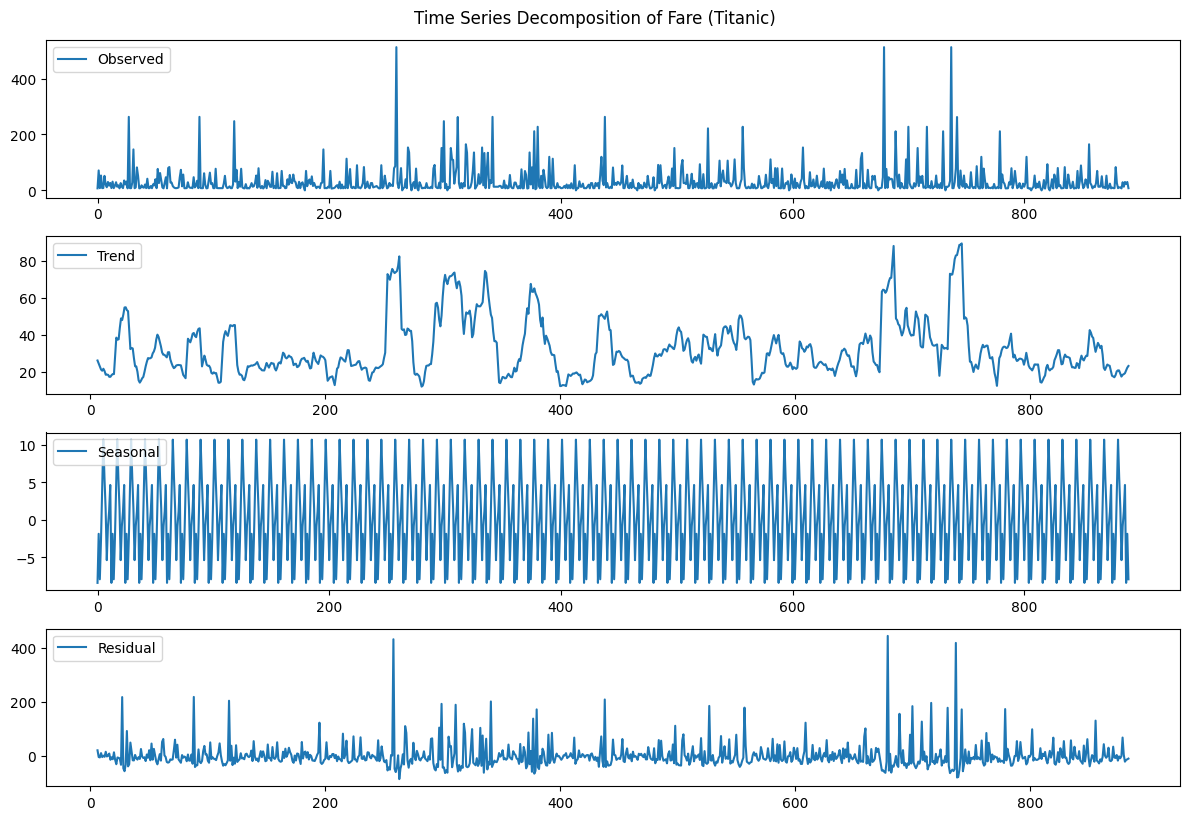

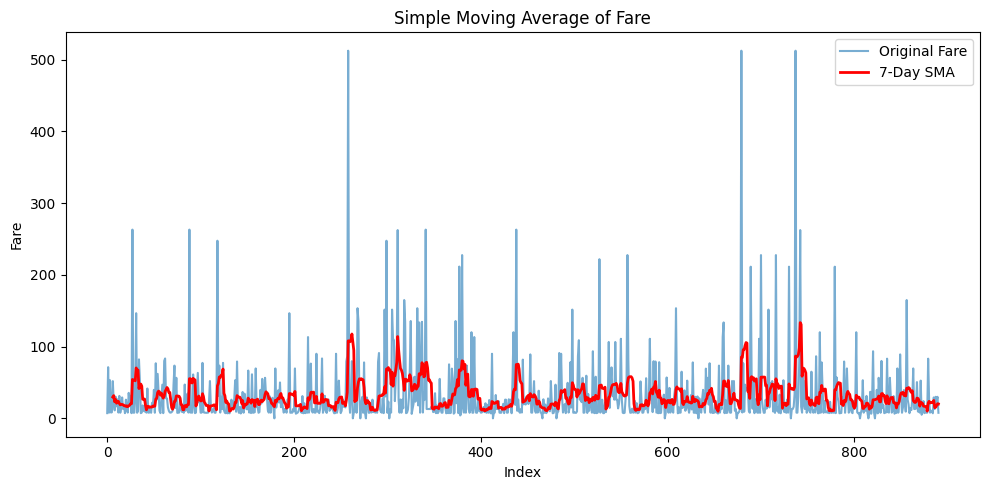

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Load Titanic dataset from seaborn
titanic = sns.load_dataset("titanic")

# Convert 'fare' to numeric and fill missing values
titanic['fare'] = pd.to_numeric(titanic['fare'], errors='coerce')
titanic['fare'] = titanic['fare'].ffill()  # <- This is the corrected line

# Create synthetic time index
titanic['Index'] = pd.RangeIndex(start=0, stop=len(titanic), step=1)
titanic.set_index('Index', inplace=True)

# --- Part 1: Seasonal Decomposition ---
decomposition = seasonal_decompose(titanic['fare'], model='additive', period=12)

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.suptitle("Time Series Decomposition of Fare (Titanic)", y=1.02)
plt.show()

# --- Part 2: Simple Moving Average ---
titanic['SMA'] = titanic['fare'].rolling(window=7).mean()

plt.figure(figsize=(10, 5))
plt.plot(titanic['fare'], label='Original Fare', alpha=0.6)
plt.plot(titanic['SMA'], label='7-Day SMA', color='red', linewidth=2)
plt.title("Simple Moving Average of Fare")
plt.xlabel("Index")
plt.ylabel("Fare")
plt.legend()
plt.tight_layout()
plt.show()
